In [11]:
#importe 
from xml.sax import make_parser
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import streamlit as st
import missingno as msno

In [12]:
#telecharge des fichiers
df_immo = pd.read_csv('immo.csv')

In [13]:
df_immo.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
df_immo.shape

(21613, 21)

In [15]:
df_immo.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
df_immo.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<AxesSubplot:>

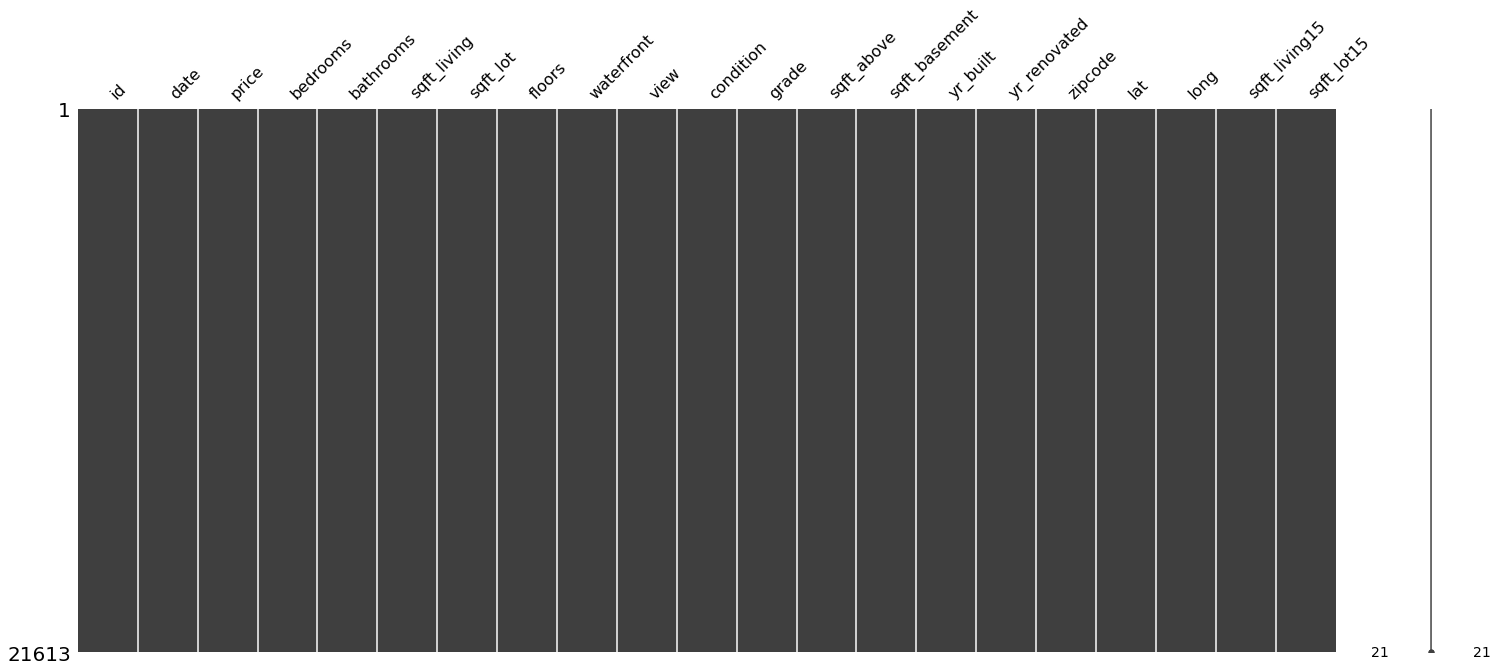

In [17]:
msno.matrix(df_immo)

In [18]:
df_immo["bathrooms"].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: bathrooms, dtype: int64

In [19]:
df_immo.groupby(["bedrooms", "id"]).mean()

price  bathrooms  sqft_living  sqft_lot  floors  \
bedrooms id                                                                
0        1222029077   265000.0       0.75          384    213444     1.0   
         1453602309   288000.0       1.50         1430      1650     3.0   
         2310060040   240000.0       2.50         1810      5669     2.0   
         2569500210   339950.0       2.50         2290      8319     2.0   
         2954400190  1295650.0       0.00         4810     28008     2.0   
...                        ...        ...          ...       ...     ...   
10       627300145   1148000.0       5.25         4590     10920     1.0   
         5566100170   650000.0       2.00         3610     11914     2.0   
         8812401450   660000.0       3.00         2920      3745     2.0   
11       1773100755   520000.0       3.00         3000      4960     2.0   
33       2402100895   640000.0       1.75         1620      6000     1.0   

                     waterfront  view  condition  grade  sqft_above  \
bedrooms id                                                           
0        1222029077           0     0          3      4         384   
         1453602309           0     0          3      7        1430   
         2310060040           0     0          3      7        1810   
         2569500210           0     0          3      8        2290   
         2954400190           0     0          3     12        4810   
...                         ...   ...        ...    ...         ...   
10       627300145            0     2          3      9        2500   
         5566100170           0     0          4      7        3010   
         8812401450           0     0          4      7        1860   
11       1773100755           0     0          3      7        2400   
33       2402100895           0     0          5      7        1040   

                     sqft_basement  yr_built  yr_renovated  zipcode      lat  \
bedrooms id                                                                    
0        1222029077              0      2003             0    98070  47.4177   
         1453602309              0      1999             0    98125  47.7222   
         2310060040              0      2003             0    98038  47.3493   
         2569500210              0      1985             0    98042  47.3473   
         2954400190              0      1990             0    98053  47.6642   
...                            ...       ...           ...      ...      ...   
10       627300145            2090      2008             0    98004  47.5861   
         5566100170            600      1958             0    98006  47.5705   
         8812401450           1060      1913             0    98105  47.6635   
11       1773100755            600      1918          1999    98106  47.5560   
33       2402100895            580      1947             0    98103  47.6878   

                        long  sqft_living15  sqft_lot15  
bedrooms id                                              
0        1222029077 -122.491           1920      224341  
         1453602309 -122.290           1430        1650  
         2310060040 -122.053           1810        5685  
         2569500210 -122.151           2500        8751  
         2954400190 -122.069           4740       35061  
...                      ...            ...         ...  
10       627300145  -122.113           2730       10400  
         5566100170 -122.175           2040       11914  
         8812401450 -122.320           1810        3745  
11       1773100755 -122.363           1420        4960  
33       2402100895 -122.331           1330        4700  

[21436 rows x 18 columns]

In [20]:
df_immo.loc[df_immo["bedrooms"] > 9 ]

2022-11-08 12:17:02.479 INFO    numexpr.utils: Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-11-08 12:17:02.481 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
13314,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
15161,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745


In [21]:
df_immo = df_immo.assign(surface = df_immo.sqft_living * 0.092903)
df_immo = df_immo.assign(m2_parcelle = df_immo.sqft_living * 0.092903)
df_immo = df_immo.assign(m2_cave = df_immo.sqft_living * 0.092903)
df_immo = df_immo.assign(surface_hab = df_immo.sqft_living15 * 0.092903)
df_immo = df_immo.assign(surface_par15 = df_immo.sqft_lot15 * 0.092903)

In [22]:
df_immo.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,surface,m2_parcelle,m2_cave,surface_hab,surface_par15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,109.625540,109.625540,109.625540,124.490020,524.901950
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,238.760710,238.760710,238.760710,157.006070,709.686017
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,71.535310,71.535310,71.535310,252.696160,748.983986
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,182.089880,182.089880,182.089880,126.348080,464.515000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,156.077040,156.077040,156.077040,167.225400,697.051209
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,98053,47.6561,-122.005,4760,101930,503.534260,503.534260,503.534260,442.218280,9469.602790
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,98003,47.3097,-122.327,2238,6819,159.328645,159.328645,159.328645,207.916914,633.505557
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,98198,47.4095,-122.315,1650,9711,98.477180,98.477180,98.477180,153.289950,902.181033
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,98146,47.5123,-122.337,1780,8113,165.367340,165.367340,165.367340,165.367340,753.722039
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,98038,47.3684,-122.031,2390,7570,175.586670,175.586670,175.586670,222.038170,703.275710


In [23]:
df_immo.loc[df_immo["yr_renovated"] < 1980 ]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,surface,m2_parcelle,m2_cave,surface_hab,surface_par15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,109.62554,109.62554,109.62554,124.49002,524.901950
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,71.53531,71.53531,71.53531,252.69616,748.983986
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,182.08988,182.08988,182.08988,126.34808,464.515000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,156.07704,156.07704,156.07704,167.22540,697.051209
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,98053,47.6561,-122.005,4760,101930,503.53426,503.53426,503.53426,442.21828,9469.602790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,98103,47.6993,-122.346,1530,1509,142.14159,142.14159,142.14159,142.14159,140.190627
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,98146,47.5107,-122.362,1830,7200,214.60593,214.60593,214.60593,170.01249,668.901600
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,98144,47.5944,-122.299,1020,2007,94.76106,94.76106,94.76106,94.76106,186.456321
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,98027,47.5345,-122.069,1410,1287,148.64480,148.64480,148.64480,130.99323,119.566161


<AxesSubplot:xlabel='surface', ylabel='price'>

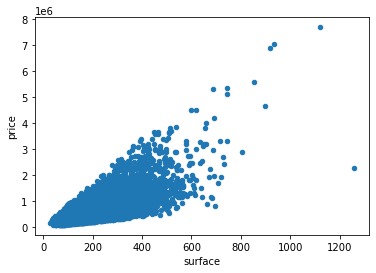

In [24]:
df_immo.plot.scatter(x="surface", y="price")

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

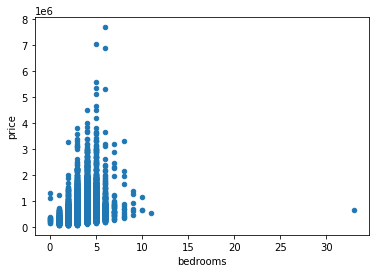

In [25]:
df_immo.plot.scatter(x="bedrooms", y="price")

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>],
       [<AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cent

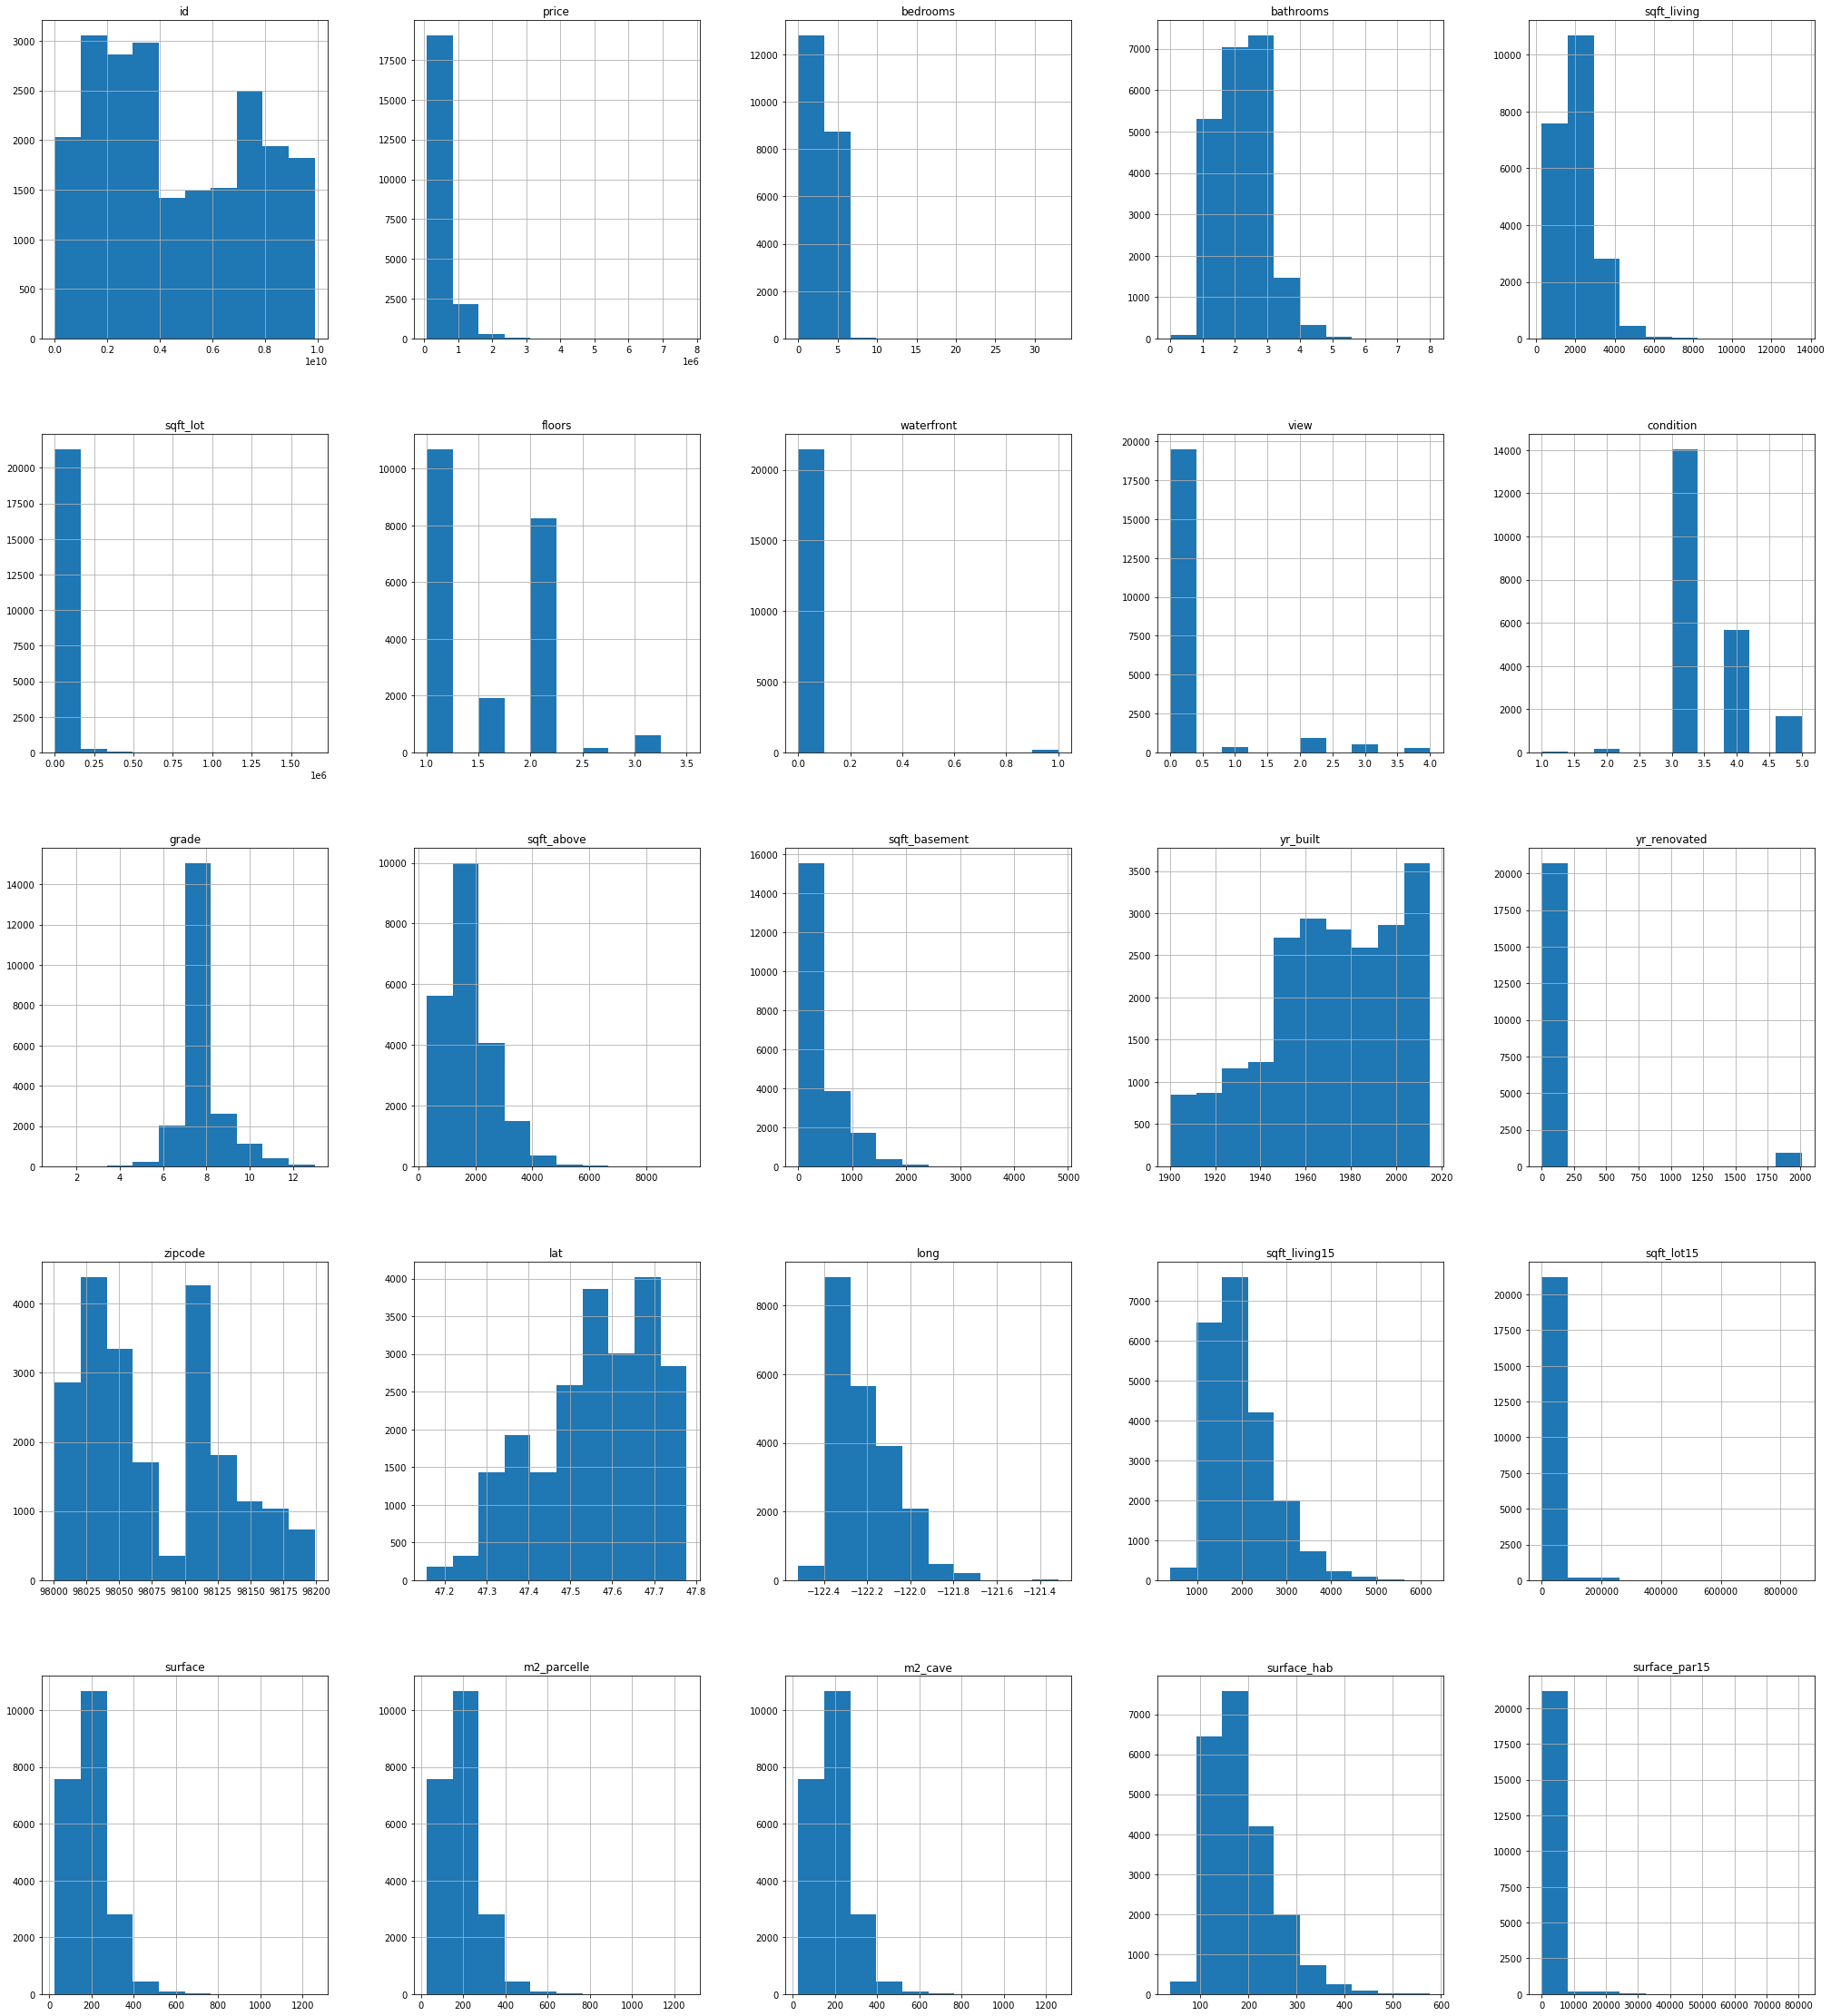

In [26]:
df_immo.hist(figsize=[35,40])

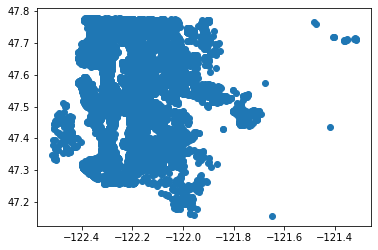

In [27]:
plt.scatter(x=df_immo["long"],y=df_immo["lat"])

In [28]:
df_immo = df_immo.join(pd.get_dummies(df_immo['zipcode']))

In [29]:
df_immo.corr().sort_values(by="price", ascending=False)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,...,-0.057171,-0.035743,-0.046009,-0.022533,-0.091665,0.040507,-0.069242,-0.054409,-0.074025,0.083659
m2_parcelle,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,...,-0.058010,-0.026280,-0.046354,-0.001424,-0.074719,0.028962,-0.042281,-0.024012,-0.041731,0.010880
surface,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,...,-0.058010,-0.026280,-0.046354,-0.001424,-0.074719,0.028962,-0.042281,-0.024012,-0.041731,0.010880
m2_cave,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,...,-0.058010,-0.026280,-0.046354,-0.001424,-0.074719,0.028962,-0.042281,-0.024012,-0.041731,0.010880
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,...,-0.058010,-0.026280,-0.046354,-0.001424,-0.074719,0.028962,-0.042281,-0.024012,-0.041731,0.010880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98002,0.009068,-0.080300,-0.004582,-0.034492,-0.047460,-0.017663,-0.028589,-0.008403,-0.028211,0.049522,...,-0.011203,-0.004957,-0.013993,-0.010512,-0.010822,-0.010533,-0.010679,-0.007671,-0.011044,-0.011761
98168,-0.053683,-0.091665,-0.045212,-0.099367,-0.074719,-0.010400,-0.069535,-0.009786,-0.032147,-0.028306,...,-0.013046,-0.005773,-0.016296,-0.012242,1.000000,-0.012267,-0.012436,-0.008933,-0.012861,-0.013697
98001,0.003833,-0.092179,0.001843,-0.018395,-0.025444,-0.000534,-0.015651,-0.011377,-0.022498,-0.014524,...,-0.015168,-0.006711,-0.018945,-0.014233,-0.014652,-0.014261,-0.014458,-0.010386,-0.014953,-0.015924
98042,0.009779,-0.100370,0.004677,0.002527,-0.017147,0.014984,0.001155,-0.014060,-0.042403,0.026972,...,-0.018744,-0.008294,-0.023412,-0.017589,-0.018107,-0.017624,-0.017867,-0.012835,-0.018478,-0.019678


In [30]:
df_immo.shape

(21613, 96)

In [31]:
df_immo = df_immo.drop('date', axis=1)

In [32]:
df_immo.to_csv('df1.csv',index=False)